In [1617]:
# Imports
import random
import networkx as nx
import matplotlib as plt
import scipy as sp
import numpy as np
%matplotlib inline

In [1618]:
# Custom functions

# Function to ensure that no probability are above 1
def regulMax(x):
    output = min(x,1)
    return output
regulMax = np.vectorize(regulMax)

# Function to adapt the coefficients of the transition matrix
def adaptMatCoeff(myMatrix,myGraph,myPropagProba):
    for i in myGraph.nodes():
        coef = len(myGraph.neighbors(i))
        myMatrix[i,:]= myMatrix[i,:]/coef
    I = np.identity(A.shape[0])*(1-myPropagProba)
    myMatrix = I + myMatrix
    return myMatrix

def correctState(prevState,curState):
    for i in range(np.size(prevState)):
        if(prevState[0,i] == 1):
            curState[0,i] =1
        if curState[0,i] >= 1:
            curState[0,i] = 1
    return curState

In [1619]:
# Infection parameters
propag_proba = 0.2

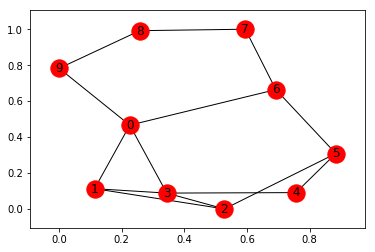

In [1620]:
# Generate a small graph
num_nodes = 10
num_connect = 3
rewire_prob = 0.5

Graph = nx.newman_watts_strogatz_graph(num_nodes,num_connect,rewire_prob)
nx.draw_networkx(Graph)

In [1621]:
# Propagation Matrix
A = nx.adjacency_matrix(Graph)
A = A*propag_proba
P = adaptMatCoeff(A,Graph,propag_proba)

# State Vector
states = np.zeros((A.shape[0],1))
source = random.choice(Graph.nodes())
states[source]=1
states = np.transpose(states)
print("Source Node = ",source)
print("Init state = ",states)
stepi = states

Source Node =  8
Init state =  [[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [1622]:
stepi = correctState(stepi,stepi * P)
print(np.transpose(stepi))

[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.1]
 [ 1. ]
 [ 0.1]]


In [1623]:
for i in range(10000):
    stepi = stepi*P
print(np.transpose(stepi))

[[ 0.17142857]
 [ 0.12857143]
 [ 0.12857143]
 [ 0.17142857]
 [ 0.08571429]
 [ 0.12857143]
 [ 0.12857143]
 [ 0.08571429]
 [ 0.08571429]
 [ 0.08571429]]
